In [1]:
from nbodykit.lab import *
import matplotlib.pyplot as plt
import numpy as np

zobs = 0.3
zinit = 3.

In [14]:
halos = BigFileCatalog('Halos_paired2_reconvr.bigfile')

/home/pcontreras/anaconda3/lib/python3.8/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


In [23]:
delta = halos.to_mesh(position='Position', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(delta, mode="1d")
Pkdelta = r.power['power'].real - r.attrs['shotnoise']
deltapre = halos.to_mesh(position='PositionRSD', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapre, mode="1d")
Pkdeltapre = r.power['power'].real - r.attrs['shotnoise']
deltapost = halos.to_mesh(position='PositionQ', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapost, mode="1d")
Pkdeltapost = r.power['power'].real - r.attrs['shotnoise']

k_array = r.power['k']
mask = (k_array <= 0.04)*(k_array > 0.02)

In [16]:
pdfpre = deltapre.apply(filters.Gaussian(r=20).filter, mode='complex', kind='wavenumber').paint(mode='real')
pdfpost = deltapost.apply(filters.Gaussian(r=20).filter, mode='complex', kind='wavenumber').paint(mode='real')

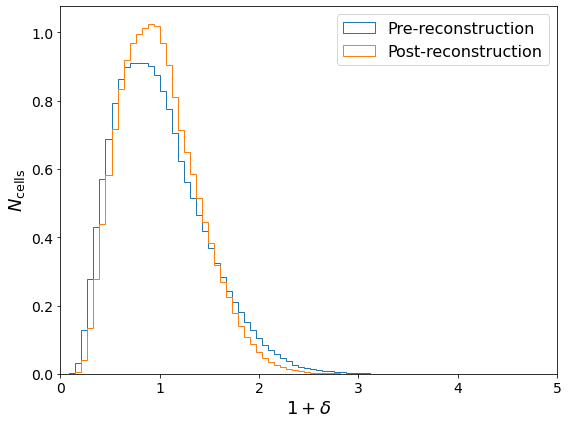

In [25]:
bins = numpy.linspace(-1, 5, 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(pdfpre.value.flatten(), bins=bins, density=True, histtype='step', label='Pre-reconstruction')
ax.hist(pdfpost.value.flatten(), bins=bins, density=True, histtype='step', label='Post-reconstruction')

# plt.hist(pdf_dm.value.flatten(), bins=bins, density=True, histtype='step', label='Dark matter')

# format the axes
ax.legend(fontsize='16')
ax.set_xlabel(r"$1+\delta$", fontsize='18')
ax.set_ylabel(r"$N_\mathrm{cells}$", fontsize='18')
ax.set(xlim=(0,5))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [18]:
linear = BigFileMesh('Initialrealization.bigfile', dataset='Field')
ICs1 = BigFileMesh('pairedICs1.bigfile', dataset='Field')
ICs2 = BigFileMesh('pairedICs2.bigfile', dataset='Field')

In [20]:
r = FFTPower(linear, mode="1d")
Pklin = r.power['power'].real
k_array = r.power['k']

r = FFTPower(ICs1, mode="1d")
PkICs1 = r.power['power'].real

r = FFTPower(ICs2, mode="1d")
PkICs2 = r.power['power'].real

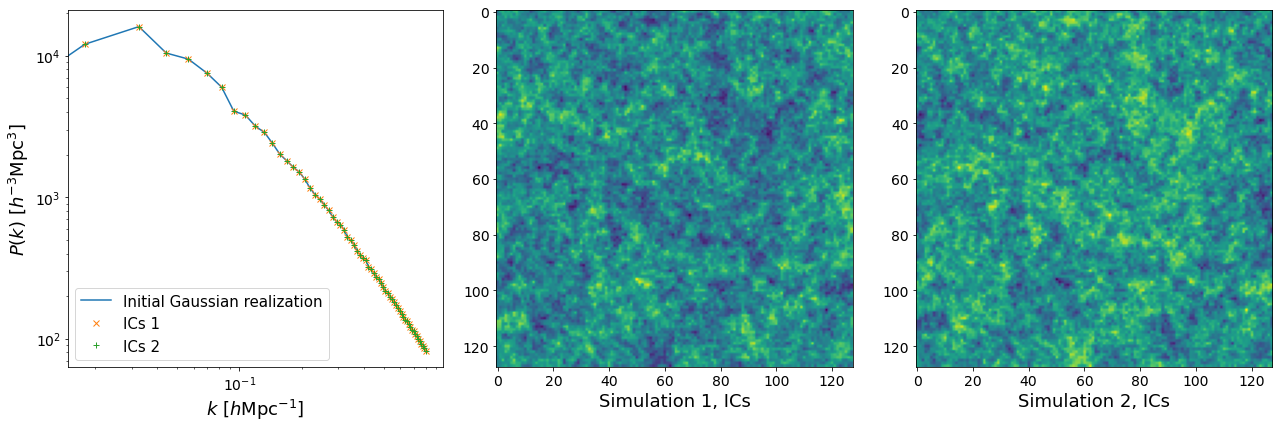

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

ax[0].loglog(k_array, Pkdelta, label='Initial Gaussian realization')
ax[0].loglog(k_array, PkICs1, 'x', label='ICs 1')
ax[0].loglog(k_array, PkICs2, '+', label='ICs 2')
ax[0].legend(fontsize='15')
ax[0].set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize='18')
ax[0].set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^{3}]$', fontsize='18')
ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[1].imshow(ICs1.paint(mode='real').preview(axes=[0,1]))
ax[1].set_xlabel('Simulation 1, ICs', fontsize='18')
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[2].imshow(ICs2.paint(mode='real').preview(axes=[0,1]))
ax[2].set_xlabel('Simulation 2, ICs', fontsize='18')
ax[2].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()

In [21]:
matter1 = BigFileCatalog('Matter_paired1.bigfile')
matterfield1 = matter1.to_mesh(resampler='cic', interlaced=True, compensated=True)
r = FFTPower(matterfield1, mode='1d')
Pk1 = r.power['power'].real - r.power.attrs['shotnoise']

matter2 = BigFileCatalog('Matter_paired2.bigfile')
matterfield2 = matter2.to_mesh(resampler='cic', interlaced=True, compensated=True)
r = FFTPower(matterfield2, mode='1d')
Pk2 = r.power['power'].real - r.power.attrs['shotnoise']

halos1 = BigFileCatalog('Halos_paired1.bigfile')
delta_halos1 = halos1.to_mesh(resampler='cic', interlaced=True, compensated=True)
r = FFTPower(delta_halos1, mode='1d')
Pkhalos1 = r.power['power'].real - r.power.attrs['shotnoise']

halos2 = BigFileCatalog('Halos_paired2.bigfile')
delta_halos2 = halos1.to_mesh(resampler='cic', interlaced=True, compensated=True)
r = FFTPower(delta_halos2, mode='1d')
Pkhalos2 = r.power['power'].real - r.power.attrs['shotnoise']

/home/pcontreras/anaconda3/lib/python3.8/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


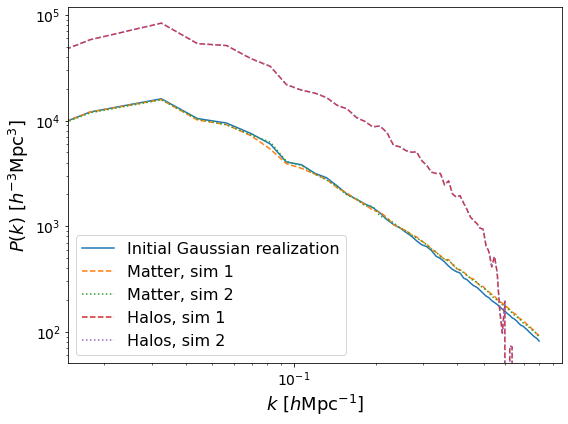

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(k_array, Pkdelta, label='Initial Gaussian realization')
ax.loglog(k_array, Pk1, '--', label='Matter, sim 1')
ax.loglog(k_array, Pk2, ':', label='Matter, sim 2')
ax.loglog(k_array, Pkhalos1, '--', label='Halos, sim 1')
ax.loglog(k_array, Pkhalos2, ':', label='Halos, sim 2')
ax.legend(fontsize='16')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize=18)
ax.set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$', fontsize=18)

plt.tight_layout()

In [4]:
IC = BigFileMesh('pairedICs1.bigfile', dataset='Field')

In [9]:
r = FFTPower(IC, mode='1d')
PkIC = r.power['power'].real - r.attrs['shotnoise']

In [8]:
def fft(inarr):
    finarr= np.fft.fftn(inarr)
    return(finarr)

def ifft(finarr):
    inarr= np.fft.ifftn(finarr)
    return(inarr)

def compute_zeld(L, nc, delta):
    '''
    Obtain displacement field under Zeldovich approximation
    '''
    
    deltaf = fft(delta)

    vfx = deltaf.copy()
    vfy = deltaf.copy()
    vfz = deltaf.copy()
    
    kfac = 2.0*np.pi/L
    
    for i in range(nc):
        for j in range(nc):
            for k in range(nc):

                if i <= nc/2:
                    kx = kfac*np.float64(i)
                else:
                    kx = -kfac*np.float64(nc-i)
                if j <= nc/2:
                    ky = kfac*np.float64(j)
                else:
                    ky = -kfac*np.float64(nc-j)
                if k <= nc/2:
                    kz = kfac*np.float64(k)
                else:
                    kz = -kfac*np.float64(nc-k)

                k2 = kx**2 + ky**2 + kz**2

                kernelx = 0.
                kernely = 0.
                kernelz = 0.


    # kernel: -nabla/nabla2 = i*kvec/k2 viene de: 
    # d(exp(i*kvec*r))/dr=i*kvec  , d(exp(i*kvec*r))2/dr2=(i*kvec)*(i*kvec)=-k2 

                epsk = 1e-14
                if k2>epsk:
                    kernelx = kx/k2
                    kernely = ky/k2
                    kernelz = kz/k2
                
                vfx.real[i,j,k] = -kernelx*deltaf.imag[i,j,k]
                vfx.imag[i,j,k] =  kernelx*deltaf.real[i,j,k]

                vfy.real[i,j,k] = -kernely*deltaf.imag[i,j,k]
                vfy.imag[i,j,k] =  kernely*deltaf.real[i,j,k]

                vfz.real[i,j,k] = -kernelz*deltaf.imag[i,j,k]
                vfz.imag[i,j,k] =  kernelz*deltaf.real[i,j,k]

    vxg = ifft(vfx)
    vx = vxg.real
    
    vyg = ifft(vfy)
    vy = vyg.real

    vzg = ifft(vfz)
    vz = vzg.real

    vel1D = np.zeros(nc**3 * 3)
    psi   = vel1D.reshape(nc,nc,nc,3)

    psi[:,:,:,0] = vx
    psi[:,:,:,1] = vy
    psi[:,:,:,2] = vz


    return psi

def displace_particles(L, nc, vel):

    d1=L/float(nc)
    d2=d1
    d3=d1

    vx = vel[:,:,:,0]
    vy = vel[:,:,:,1]
    vz = vel[:,:,:,2]

    pos1d = np.zeros(nc**3*3)
    pos = pos1d.reshape(nc,nc,nc,3)
    posic=pos
    posn3 = pos1d.reshape(nc**3, 3)

    for i in range(nc):
      for j in range(nc):
        for k in range(nc):

          rx = 0.5*d1
          ry = 0.5*d2
          rz = 0.5*d3 

          xp = float(i)*d1+rx
          yp = float(j)*d2+ry
          zp = float(k)*d3+rz

          posic[i,j,k,0]=xp
          posic[i,j,k,1]=yp
          posic[i,j,k,2]=zp


          # if i==0:
          #   if j==0:
          #     if k==0:
                # print("check: x[0] = ", xp)

          xp += vx[i,j,k]
          yp += vy[i,j,k]
          zp += vz[i,j,k]

          # if i==0:
          #   if j==0:
          #     if k==0:
                # print("check: x[0]+Psi[0] = ", xp)

          per = True
          if per==True:
            if xp<0.:
              xp+=L
            if xp>=L:
              xp-=L

            if yp<0.:
              yp+=L
            if yp>=L:
             yp-=L

            if zp<0.:
              zp+=L
            if zp>=L:
              zp-=L

          pos[i,j,k,0]=xp
          pos[i,j,k,1]=yp
          pos[i,j,k,2]=zp

          l = k + j*(nc + i)
          posn3[l,0]=xp
          posn3[l,1]=yp
          posn3[l,2]=zp

    return pos, posn3

Length = 499
Nc = 128

forward_displf = compute_zeld(Length, Nc, IC.paint(mode='real'))

In [10]:
pos_mesh, pos_array = displace_particles(Length, Nc, forward_displf)

ww = np.ones(len(pos_array))
with open('dummy_file.dat', 'wb') as ff:
    pos_array.tofile(ff); ww.tofile(ff); ff.seek(0)

f = BinaryCatalog(ff.name, [('Position', ('f8', 3)), ('Mass', ('f8', 1))], size=len(pos_array))
dens_nb = f.to_mesh(Nmesh=Nc, BoxSize=Length, resampler='cic', interlaced=True, compensated=True)
r = FFTPower(dens_nb, mode='1d')
Pkf_nb = r.power['power'].real - r.attrs['shotnoise']

/home/pcontreras/anaconda3/lib/python3.8/site-packages/nbodykit/io/binary.py:74: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  dtype = numpy.dtype(dtype)


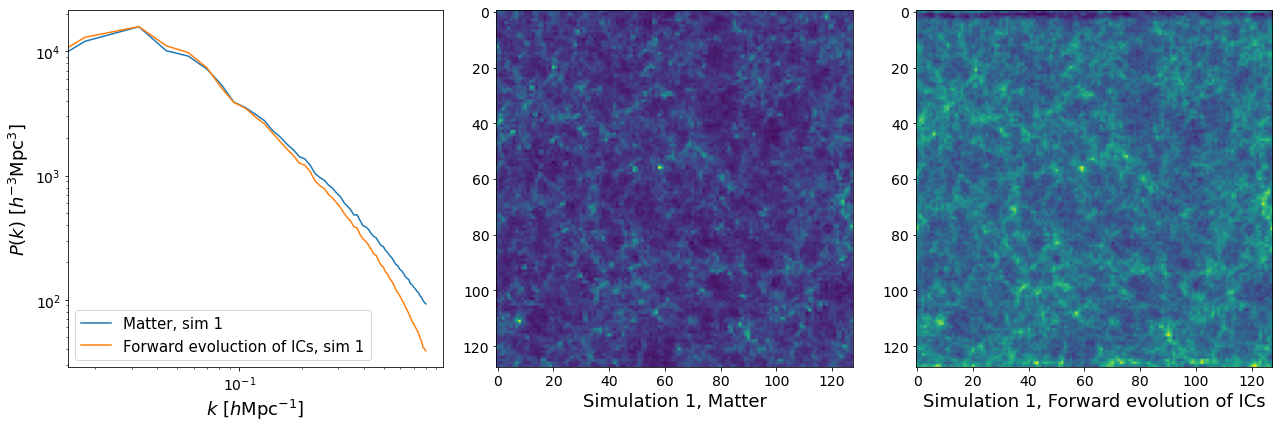

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

ax[0].loglog(k_array, Pk1, label='Matter, sim 1')
ax[0].loglog(k_array, Pkf_nb, label='Forward evoluction of ICs, sim 1')
ax[0].legend(fontsize='15')
ax[0].set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize='18')
ax[0].set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^{3}]$', fontsize='18')
ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[1].imshow(matterfield1.paint(mode='real').preview(axes=[0,1]))
ax[1].set_xlabel('Simulation 1, Matter', fontsize='18')
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[2].imshow(dens_nb.paint(mode='real').preview(axes=[0,1]))
ax[2].set_xlabel('Simulation 1, Forward evolution of ICs', fontsize='18')
ax[2].tick_params(axis='both', which='major', labelsize=14)

plt.rcParams['axes.labelsize'] = 15
plt.tight_layout()